# Loading Deepmind's Diplomacy trajectory

In [ ]:
import numpy as np

In [ ]:
action_outputs = np.load(file='../data/actions_outputs.npz', allow_pickle=True)

In [ ]:
action_outputs[1][0]

In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame.from_dict(action_outputs[0][0]).corr(method='pearson')

In [ ]:
legal_actions = np.load(file='../data/legal_actions.npz', allow_pickle=True)

In [ ]:
len(legal_actions)

In [ ]:
legal_actions[0].shape

In [ ]:
observations = np.load(file='../data/observations.npz', allow_pickle=True)

In [ ]:
len(observations)

In [ ]:
observations[1]

In [ ]:
step_outputs = np.load(file='../data/step_outputs.npz', allow_pickle=True)

In [ ]:
len(step_outputs)

In [ ]:
step_outputs[0]

# Loading human plays' data

In [79]:
import json
import pandas as pd
import mmap

In [80]:
# games_jsons = []
# ix = 0
# with open("../data/diplomacy-v1-27k-msgs/standard_no_press.jsonl", "r") as json_file:
#     for line in json_file:
#         games_jsons.append(json.loads(line))

In [81]:
# Load the json data
games_jsons = []
with open("../data/diplomacy-v1-27k-msgs/standard_no_press.jsonl", "r+b") as json_file:
    with mmap.mmap(json_file.fileno(), length=0, access=mmap.ACCESS_READ) as mmap_object:
        for i, line in enumerate(iter(mmap_object.readline, b"")):
            games_jsons.append(json.loads(line.decode("utf-8")))
            if i == 20:
                break

## Uncomment to load RL single game data

In [82]:

# games_jsons = []
# json_file_path = "../data/game_rl_0.json"

# with open(json_file_path, 'r') as j:
#       games_jsons.append(json.loads(j.read()))

In [83]:
# Convert to a pandas dataframe
df = pd.DataFrame(games_jsons)

In [84]:
df = df[df["map"] == "standard"].reset_index(drop=True)

In [85]:
df

,id,map,rules,phases
0,uXFQ2zgI-DUrgwlS,standard,"[NO_PRESS, POWER_CHOICE]","[{'name': 'S1901M', 'state': {'timestamp': 154..."
1,X9hvE_k6LbQrauYc,standard,"[NO_PRESS, POWER_CHOICE]","[{'name': 'S1901M', 'state': {'timestamp': 154..."
2,lVp6PZxk3Jpufc9Z,standard,"[NO_PRESS, POWER_CHOICE]","[{'name': 'S1901M', 'state': {'timestamp': 154..."
3,rW_Q9TpidGLGD2EL,standard,"[NO_PRESS, POWER_CHOICE]","[{'name': 'S1901M', 'state': {'timestamp': 154..."
4,HYc16KDWi8zHNlmn,standard,"[NO_PRESS, POWER_CHOICE]","[{'name': 'S1901M', 'state': {'timestamp': 154..."
5,_xZyPB0yRDQjRB4x,standard,"[NO_PRESS, POWER_CHOICE]","[{'name': 'S1901M', 'state': {'timestamp': 154..."
6,CRbbNicSK5Jc-qmb,standard,"[NO_PRESS, POWER_CHOICE]","[{'name': 'S1901M', 'state': {'timestamp': 154..."
7,ZSFmLzi-Th6lbpxy,standard,"[NO_PRESS, POWER_CHOICE]","[{'name': 'S1901M', 'state': {'timestamp': 154..."
8,57xpw6Z-8IKo2hDK,standard,"[NO_PRESS, POWER_CHOICE]","[{'name': 'S1901M', 'state': {'timestamp': 154..."
9,sdKZrT-i_BvEZsFU,standard,"[NO_PRESS, POWER_CHOICE]","[{'name': 'S1901M', 'state': {'timestamp': 154..."


In [86]:
games = df['phases']

In [87]:
games.apply(lambda x: x[0])

0     {'name': 'S1901M', 'state': {'timestamp': 1542...
1     {'name': 'S1901M', 'state': {'timestamp': 1542...
2     {'name': 'S1901M', 'state': {'timestamp': 1542...
3     {'name': 'S1901M', 'state': {'timestamp': 1542...
4     {'name': 'S1901M', 'state': {'timestamp': 1542...
5     {'name': 'S1901M', 'state': {'timestamp': 1542...
6     {'name': 'S1901M', 'state': {'timestamp': 1542...
7     {'name': 'S1901M', 'state': {'timestamp': 1542...
8     {'name': 'S1901M', 'state': {'timestamp': 1542...
9     {'name': 'S1901M', 'state': {'timestamp': 1542...
10    {'name': 'S1901M', 'state': {'timestamp': 1542...
11    {'name': 'S1901M', 'state': {'timestamp': 1542...
12    {'name': 'S1901M', 'state': {'timestamp': 1542...
13    {'name': 'S1901M', 'state': {'timestamp': 1542...
Name: phases, dtype: object

In [88]:
type(games)

pandas.core.series.Series

In [89]:
for game in games:
    for ix, iy in enumerate(game):
        game[ix]['phase_id'] = ix

In [90]:
def flatten_json(input):
    out = {}
    out['game_id'] = input['state']['game_id']
    out['phase_id'] = input['phase_id']
    out['phase_name'] = input['name']
    results_units_keys = [x for x in input['results']]

    assert input['orders'].items() 
    for player, orders in input['orders'].items():
        if orders is not None:
            if orders:
                for order in orders:
                    out['coordinator'] = player
                    out['type'] = order.split()[0]
                    out['current_location'] = order.split()[1]
                    out['action'] = order.split()[2]
                    unit = order.split()[0]+ ' ' + order.split()[1]
                    # print("unit result is: ", unit , unit in results_units, results_units)
                    if input['results']:
                        out['results'] = input['results'][unit]
                    else:
                        print("empty results")
                        print(order)
                    if unit in results_units_keys:
                        results_units_keys.remove(unit)
                    out['impact_location'] = []
                    if out['action'] == '-' or out['action'] == 'R':
                        assert len(order.split()) == 4 or len(order.split()) == 5, order
                        out['impact_location'] = order.split()[3]
                    yield(out)
                else:
                    out['coordinator'] = player
                    out['type'] = -1
                    out['current_location'] = -1
                    out['action'] = -1
                    out['results'] = -1
                    out['impact_location'] = -1
                    if out['action'] == '-' or out['action'] == 'R':
                        assert len(order.split()) == 4 or len(order.split()) == 5, order
                        out['impact_location'] = order.split()[3]
                    yield(out)
            else:
                # we have non eorders, is that a problem ?
                pass

    if len(results_units_keys)>0:
        for unit in results_units_keys:
            if unit == 'WAIVE': ## FIXME: double check this later
                continue
            assert len(unit.split()) == 2, unit
            out['coordinator'] = 'RA'
            for player in input["state"]["units"]:
                if unit in input["state"]["units"][player]:
                    out['coordinator'] = player

            if len(unit.split()[0]) != 1: # if we have sth like HOL D: "void"
                assert input['results'][unit][0] == 'void', input['results'][unit]
                location = unit.split()[0]
                assert unit.split()[1] == 'D', unit.split()[1]
                # find the corresponding key in the results
                for key in input['results']:
                    if key.split()[1] == location:
                        assert input['results'][key][0] == "disband", input['results'][key]
                        input['results'][key].append(input['results'][unit][0])
                        break
            else:
                out['type'] = unit.split()[0]
                out['current_location'] = unit.split()[1]
                out['results'] = input['results'][unit]
                out['action'] = -2
                out['impact_location'] = -2
                yield(out)

In [91]:
all_records = []
for idx, game in enumerate(games):
  for idx, phase in enumerate(game):
    row_generator = flatten_json(phase)
    assert row_generator is not None, row_generator
    for row in row_generator:
      all_records.append(row.copy())

empty results
A VEN D


In [92]:
complete_df = pd.DataFrame.from_records(all_records)

In [93]:
complete_df

,game_id,phase_id,phase_name,coordinator,type,current_location,action,results,impact_location
0,uXFQ2zgI-DUrgwlS,0,S1901M,AUSTRIA,F,TRI,H,[],[]
1,uXFQ2zgI-DUrgwlS,0,S1901M,AUSTRIA,A,VIE,H,[],[]
2,uXFQ2zgI-DUrgwlS,0,S1901M,AUSTRIA,A,BUD,-,[],SER
3,uXFQ2zgI-DUrgwlS,0,S1901M,AUSTRIA,-1,-1,-1,-1,-1
4,uXFQ2zgI-DUrgwlS,0,S1901M,ENGLAND,A,LVP,-,[],EDI
...,...,...,...,...,...,...,...,...,...
11021,7uKSGh-EG86tfpyh,30,S1908M,TURKEY,A,MOS,S,[],[]
11022,7uKSGh-EG86tfpyh,30,S1908M,TURKEY,F,AEG,S,[],[]
11023,7uKSGh-EG86tfpyh,30,S1908M,TURKEY,F,GRE,S,[],[]
11024,7uKSGh-EG86tfpyh,30,S1908M,TURKEY,A,BUD,S,[cut],[]


In [94]:
complete_df[:40]

,game_id,phase_id,phase_name,coordinator,type,current_location,action,results,impact_location
0,uXFQ2zgI-DUrgwlS,0,S1901M,AUSTRIA,F,TRI,H,[],[]
1,uXFQ2zgI-DUrgwlS,0,S1901M,AUSTRIA,A,VIE,H,[],[]
2,uXFQ2zgI-DUrgwlS,0,S1901M,AUSTRIA,A,BUD,-,[],SER
3,uXFQ2zgI-DUrgwlS,0,S1901M,AUSTRIA,-1,-1,-1,-1,-1
4,uXFQ2zgI-DUrgwlS,0,S1901M,ENGLAND,A,LVP,-,[],EDI
5,uXFQ2zgI-DUrgwlS,0,S1901M,ENGLAND,F,EDI,-,[],NWG
6,uXFQ2zgI-DUrgwlS,0,S1901M,ENGLAND,F,LON,-,[],NTH
7,uXFQ2zgI-DUrgwlS,0,S1901M,ENGLAND,-1,-1,-1,-1,-1
8,uXFQ2zgI-DUrgwlS,0,S1901M,FRANCE,F,BRE,-,[],MAO
9,uXFQ2zgI-DUrgwlS,0,S1901M,FRANCE,A,PAR,-,[],PIC


In [95]:
complete_df.loc[complete_df['coordinator'] == 'RA']

,game_id,phase_id,phase_name,coordinator,type,current_location,action,results,impact_location
266,X9hvE_k6LbQrauYc,6,W1902A,RA,F,SEV,-2,[disband],-2
441,X9hvE_k6LbQrauYc,13,F1904R,RA,A,HOL,-2,"[disband, void]",-2
2124,rW_Q9TpidGLGD2EL,14,F1904R,RA,F,TRI,-2,"[disband, void]",-2
2374,rW_Q9TpidGLGD2EL,26,S1907R,RA,F,RUM,-2,"[disband, void]",-2
2840,HYc16KDWi8zHNlmn,16,F1904R,RA,A,SPA,-2,"[disband, void]",-2
3085,_xZyPB0yRDQjRB4x,6,W1902A,RA,F,SEV,-2,[disband],-2
3552,_xZyPB0yRDQjRB4x,29,F1907R,RA,A,NAP,-2,"[disband, void]",-2
3553,_xZyPB0yRDQjRB4x,29,F1907R,RA,F,ROM,-2,"[disband, void]",-2
4986,ZSFmLzi-Th6lbpxy,2,W1901A,RA,F,SEV,-2,[disband],-2
5298,ZSFmLzi-Th6lbpxy,16,S1905R,RA,A,LON,-2,"[disband, void]",-2


In [96]:
complete_df['unique_unit_id'] = -1

In [97]:
complete_df

,game_id,phase_id,phase_name,coordinator,type,current_location,action,results,impact_location,unique_unit_id
0,uXFQ2zgI-DUrgwlS,0,S1901M,AUSTRIA,F,TRI,H,[],[],-1
1,uXFQ2zgI-DUrgwlS,0,S1901M,AUSTRIA,A,VIE,H,[],[],-1
2,uXFQ2zgI-DUrgwlS,0,S1901M,AUSTRIA,A,BUD,-,[],SER,-1
3,uXFQ2zgI-DUrgwlS,0,S1901M,AUSTRIA,-1,-1,-1,-1,-1,-1
4,uXFQ2zgI-DUrgwlS,0,S1901M,ENGLAND,A,LVP,-,[],EDI,-1
...,...,...,...,...,...,...,...,...,...,...
11021,7uKSGh-EG86tfpyh,30,S1908M,TURKEY,A,MOS,S,[],[],-1
11022,7uKSGh-EG86tfpyh,30,S1908M,TURKEY,F,AEG,S,[],[],-1
11023,7uKSGh-EG86tfpyh,30,S1908M,TURKEY,F,GRE,S,[],[],-1
11024,7uKSGh-EG86tfpyh,30,S1908M,TURKEY,A,BUD,S,[cut],[],-1


## Issues:
- [] type is incorrect for added rows in the result dict
- [] ids do not start from 1 at the beginning of each game 
- [] NaN orders ... probably order list for player is empty for some reason

# Temporal Binding

In [98]:
def assign_unit_id(phase_df, source_unit_id_map, dest_unit_id_map, _id):

    # fror each row in the phase df
    for idx, row in phase_df.iterrows():

        # if current location or type of army in invalid skip the row (we only deal with valid orders)
        if row['action'] == -1 or row['type'] == 'N':
            continue
        
        # get the current location of the unit
        source_unit = row['type'] + ' ' + row['current_location']

        # if the location is not in the map, add it to the map (in other phases the same unit can be used, hence checking the condition _ dictionaries are global, have data across phases)
        if source_unit not in source_unit_id_map:
            source_unit_id_map[source_unit] = _id
            _id += 1

        # destination dict is synced with source dict after the loop, so that we can use updated info at the beginning of each assignment
        # row['unique_unit_id'] = source_unit_id_map[source_unit]
        phase_df.loc[idx,'unique_unit_id'] = source_unit_id_map[source_unit]

        if row['action'] == '-':
            result = row['results']
            if isinstance(result, list):
                if len(result) == 0:
                    dest_location = row['impact_location']
                    try:
                        dest_unit = row['type'] + ' ' + dest_location
                    except:
                        print("dest location error", row)
                        return
                    if dest_unit not in dest_unit_id_map:
                        dest_unit_id_map[dest_unit] = source_unit_id_map.pop(source_unit)
                        # source_unit_id_map[source_unit]
                        # print(source_unit_id_map.pop(source_unit))
                elif 'disband' in result:
                    source_unit_id_map.pop(source_unit)
                    
        elif row['action'] == 'R':
            result = row['results']
            if isinstance(result, list):
                if len(result) == 0:
                    dest_location = row['impact_location']
                    dest_unit = row['type'] + ' ' + dest_location
                    if dest_unit not in dest_unit_id_map:
                        dest_unit_id_map[dest_unit] = source_unit_id_map.pop(source_unit)
                elif 'disband' in result:
                    if len(result) > 1:
                        if 'void' in result:
                                print(result)
                    source_unit_id_map.pop(source_unit)

        elif row['action'] == 'D':
            result = row['results']
            assert source_unit in source_unit_id_map
            if isinstance(result, list):
                if len(result) == 0:
                    source_unit_id_map.pop(source_unit)
                elif 'void' in result:
                    print("void disband", row)
        
        elif row['action'] == 'B':
            assert source_unit in source_unit_id_map

        elif row['action'] == 'H':
            assert source_unit in source_unit_id_map

        elif row['action'] == 'S':
            assert source_unit in source_unit_id_map
        
        elif row['action'] == 'C':
            assert source_unit in source_unit_id_map

        # for added result rows
        elif row['action'] == -2:
            result = row['results']
            assert source_unit in source_unit_id_map
            if isinstance(result, list):
                if len(result) == 0:
                    source_unit_id_map.pop(source_unit)
                elif 'disband' in result and 'void' not in result:
                    source_unit_id_map.pop(source_unit)
                    # print("disband")
                elif 'disband' in result and 'void' in result:
                    # print("void disband")
                    pass
        else:
            print("invalid action", row)

    # merge the source and destination dictionaries into one
    source_unit_id_map.update(dest_unit_id_map)
    # remove the destination dict (values get updated based on old data if we don't do this)
    dest_unit_id_map = {}

    return source_unit_id_map, dest_unit_id_map, _id

In [99]:
unique_games = complete_df["game_id"].unique()

In [100]:
unique_games

array(['uXFQ2zgI-DUrgwlS', 'X9hvE_k6LbQrauYc', 'lVp6PZxk3Jpufc9Z',
       'rW_Q9TpidGLGD2EL', 'HYc16KDWi8zHNlmn', '_xZyPB0yRDQjRB4x',
       'CRbbNicSK5Jc-qmb', 'ZSFmLzi-Th6lbpxy', '57xpw6Z-8IKo2hDK',
       'sdKZrT-i_BvEZsFU', 'p6m8jMuDPsM0dtUh', 'oIIaa9M0NHem5XE_',
       '5F6upbHF5NZlWuY_', '7uKSGh-EG86tfpyh'], dtype=object)

In [101]:
complete_df.loc[complete_df["game_id"] == 'uXFQ2zgI-DUrgwlS']['phase_id'].unique()

array([0, 1, 2, 3, 4])

In [102]:
game_phase_df_list = []
for idx, game_id in enumerate(unique_games):
    print(idx, game_id)
    s_dict = {}
    d_dict = {}
    _id = 1
    unique_phases = complete_df.loc[complete_df["game_id"] == game_id]['phase_id'].unique()
    for phase in unique_phases:
        # print("phase number is", phase)
        phase_df = complete_df.loc[complete_df["phase_id"] == phase]
        s_dict, d_dict, _id = assign_unit_id(phase_df, s_dict, d_dict, _id)
        game_phase_df_list.append(phase_df)

0 uXFQ2zgI-DUrgwlS
1 X9hvE_k6LbQrauYc


/Users/ens/miniforge3/envs/marl/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


2 lVp6PZxk3Jpufc9Z
3 rW_Q9TpidGLGD2EL
4 HYc16KDWi8zHNlmn
5 _xZyPB0yRDQjRB4x
6 CRbbNicSK5Jc-qmb
['bounce', 'disband']
['bounce', 'disband']
7 ZSFmLzi-Th6lbpxy
8 57xpw6Z-8IKo2hDK
9 sdKZrT-i_BvEZsFU
10 p6m8jMuDPsM0dtUh
11 oIIaa9M0NHem5XE_
['bounce', 'disband']
['bounce', 'disband']
12 5F6upbHF5NZlWuY_
13 7uKSGh-EG86tfpyh


In [103]:
# cdf = pd.concat(game_phase_df_list, ignore_index=True)
cdf = pd.concat(game_phase_df_list)

In [104]:
cdf.loc[cdf['coordinator'] == 'RA']

,game_id,phase_id,phase_name,coordinator,type,current_location,action,results,impact_location,unique_unit_id
4986,ZSFmLzi-Th6lbpxy,2,W1901A,RA,F,SEV,-2,[disband],-2,93
5854,57xpw6Z-8IKo2hDK,2,W1901A,RA,F,RUM,-2,[disband],-2,64
9675,5F6upbHF5NZlWuY_,2,W1901A,RA,F,SEV,-2,[disband],-2,110
4986,ZSFmLzi-Th6lbpxy,2,W1901A,RA,F,SEV,-2,[disband],-2,93
5854,57xpw6Z-8IKo2hDK,2,W1901A,RA,F,RUM,-2,[disband],-2,64
...,...,...,...,...,...,...,...,...,...,...
10145,5F6upbHF5NZlWuY_,24,F1906R,RA,A,SPA,-2,"[disband, void]",-2,847
2374,rW_Q9TpidGLGD2EL,26,S1907R,RA,F,RUM,-2,"[disband, void]",-2,952
7275,sdKZrT-i_BvEZsFU,28,S1907R,RA,A,DEN,-2,"[disband, void]",-2,843
3552,_xZyPB0yRDQjRB4x,29,F1907R,RA,A,NAP,-2,"[disband, void]",-2,524


In [105]:
cdf.loc[cdf['game_id'] == 'X9hvE_k6LbQrauYc'][:40].sort_values(by=['phase_id', 'unique_unit_id'])

,game_id,phase_id,phase_name,coordinator,type,current_location,action,results,impact_location,unique_unit_id
107,X9hvE_k6LbQrauYc,0,S1901M,AUSTRIA,-1,-1,-1,-1,-1,-1
111,X9hvE_k6LbQrauYc,0,S1901M,ENGLAND,-1,-1,-1,-1,-1,-1
115,X9hvE_k6LbQrauYc,0,S1901M,FRANCE,-1,-1,-1,-1,-1,-1
119,X9hvE_k6LbQrauYc,0,S1901M,GERMANY,-1,-1,-1,-1,-1,-1
123,X9hvE_k6LbQrauYc,0,S1901M,ITALY,-1,-1,-1,-1,-1,-1
128,X9hvE_k6LbQrauYc,0,S1901M,RUSSIA,-1,-1,-1,-1,-1,-1
132,X9hvE_k6LbQrauYc,0,S1901M,TURKEY,-1,-1,-1,-1,-1,-1
105,X9hvE_k6LbQrauYc,0,S1901M,AUSTRIA,F,TRI,-,[],ALB,1
104,X9hvE_k6LbQrauYc,0,S1901M,AUSTRIA,A,VIE,-,[],GAL,2
116,X9hvE_k6LbQrauYc,0,S1901M,GERMANY,A,MUN,-,[bounce],BUR,10


In [106]:
cdf.loc[cdf['game_id'] == "uXFQ2zgI-DUrgwlS"]

,game_id,phase_id,phase_name,coordinator,type,current_location,action,results,impact_location,unique_unit_id
0,uXFQ2zgI-DUrgwlS,0,S1901M,AUSTRIA,F,TRI,H,[],[],1
1,uXFQ2zgI-DUrgwlS,0,S1901M,AUSTRIA,A,VIE,H,[],[],2
2,uXFQ2zgI-DUrgwlS,0,S1901M,AUSTRIA,A,BUD,-,[],SER,3
3,uXFQ2zgI-DUrgwlS,0,S1901M,AUSTRIA,-1,-1,-1,-1,-1,-1
4,uXFQ2zgI-DUrgwlS,0,S1901M,ENGLAND,A,LVP,-,[],EDI,4
...,...,...,...,...,...,...,...,...,...,...
99,uXFQ2zgI-DUrgwlS,3,S1902M,TURKEY,F,ANK,H,[],[],111
100,uXFQ2zgI-DUrgwlS,3,S1902M,TURKEY,A,BUL,H,[],[],20
101,uXFQ2zgI-DUrgwlS,3,S1902M,TURKEY,-1,-1,-1,-1,-1,-1
102,uXFQ2zgI-DUrgwlS,4,S1902R,ITALY,A,VEN,D,NaN,[],49


<AxesSubplot:xlabel='phase_id'>

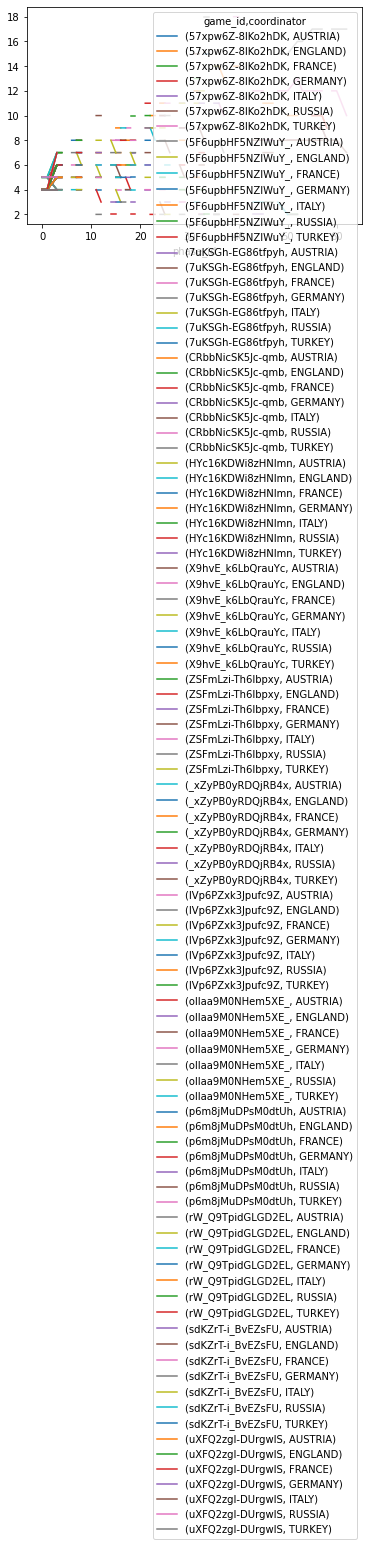

In [107]:
spring_fall_phases=(cdf['phase_name'].apply(lambda x:x[0])!='W') & (cdf['phase_name'].apply(lambda x:x[-1])!='R')
cdf[spring_fall_phases].groupby(["game_id","coordinator","phase_id"])["unique_unit_id"].nunique().unstack().T.plot()

In [108]:
cdf.groupby(["game_id","coordinator","phase_id"])["unique_unit_id"].nunique().unstack().head(8)

phase_id                       0    1    2    3    4    5    6    7    8   \
game_id          coordinator                                                
57xpw6Z-8IKo2hDK AUSTRIA      4.0  4.0  3.0  6.0  6.0  NaN  2.0  5.0  NaN   
                 ENGLAND      4.0  4.0  2.0  5.0  5.0  NaN  4.0  8.0  NaN   
                 FRANCE       4.0  4.0  2.0  5.0  5.0  2.0  3.0  6.0  NaN   
                 GERMANY      4.0  4.0  2.0  5.0  5.0  NaN  NaN  5.0  NaN   
                 ITALY        4.0  4.0  3.0  6.0  6.0  NaN  2.0  7.0  2.0   
                 RA           NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN   
                 RUSSIA       5.0  5.0  NaN  4.0  4.0  NaN  NaN  4.0  NaN   
                 TURKEY       4.0  4.0  3.0  6.0  6.0  NaN  NaN  6.0  NaN   

phase_id                       9   ...  53  54  55  56  57  58  59  60  61  62  
game_id          coordinator       ...                                          
57xpw6Z-8IKo2hDK AUSTRIA      5.0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
                 ENGLAND      8.0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
                 FRANCE       6.0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
                 GERMANY      5.0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
                 ITALY        7.0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
                 RA           NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
                 RUSSIA       4.0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
                 TURKEY       6.0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[8 rows x 63 columns]

In [150]:
from pprint import pprint
import json

In [75]:
cdf[spring_fall_phases].loc[cdf["game_id"] == "57xpw6Z-8IKo2hDK"]

ValueError: cannot reindex from a duplicate axis

In [ ]:
for game in games_jsons:
    if game['id'] == "57xpw6Z-8IKo2hDK":
        json.dump(game, open('57xpw6Z-8IKo2hDK.json', 'w'))